In [387]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import sklearn

In [388]:
df = pd.read_csv("data/DatasetFiltrado.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193785 entries, 0 to 193784
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Ciclo             193785 non-null  int64 
 1   CodigoAsignatura  193785 non-null  int64 
 2   Asignatura        193785 non-null  object
 3   CodigoCarrera     193785 non-null  object
 4   Anho              193785 non-null  int64 
 5   Semestre          193785 non-null  int64 
 6   ConFirmaPrevia    193785 non-null  bool  
 7   Aprobado          193785 non-null  bool  
 8   1P                193785 non-null  int64 
 9   2P                193785 non-null  int64 
 10  Taller            193785 non-null  int64 
 11  1R                193785 non-null  int64 
 12  2R                193785 non-null  int64 
 13  Asistencia        193785 non-null  bool  
 14  IdAnonimizado     193785 non-null  int64 
 15  1F                193785 non-null  int64 
 16  2F                193785 non-null  int

La materia a analizar será Estática:

In [389]:
nombre_asignatura = "ESTATICA"

In [390]:
df_asignatura = df[df["Asignatura"] == nombre_asignatura]
df_asignatura.drop(columns=["Asignatura", "CodigoAsignatura", "CodigoCarrera"], inplace=True)
df_asignatura

C:\Users\theca\AppData\Local\Temp\ipykernel_14440\4172095478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asignatura.drop(columns=["Asignatura", "CodigoAsignatura", "CodigoCarrera"], inplace=True)


,Ciclo,Anho,Semestre,ConFirmaPrevia,Aprobado,1P,2P,Taller,1R,2R,Asistencia,IdAnonimizado,1F,2F,3F
9180,2,2012,2,False,False,2,13,0,0,0,True,469,0,0,0
9181,2,2012,2,False,False,6,11,0,0,0,True,470,0,0,0
9182,2,2012,2,True,True,12,24,0,0,0,True,175,0,0,2
9183,2,2012,2,False,False,1,1,0,0,0,True,910,0,0,0
9184,2,2012,2,False,False,0,0,0,0,0,False,1475,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184226,1,2021,1,False,False,0,0,0,0,0,True,4831,0,0,0
184227,1,2021,1,False,False,0,0,0,0,0,True,4339,0,0,0
184228,1,2021,1,False,False,0,0,0,0,0,True,4530,0,0,0
184229,1,2021,1,False,False,0,0,0,0,0,True,3331,0,0,0


In [391]:
df_desercion = df_asignatura[df_asignatura["1P"] != 0]
df_desercion

,Ciclo,Anho,Semestre,ConFirmaPrevia,Aprobado,1P,2P,Taller,1R,2R,Asistencia,IdAnonimizado,1F,2F,3F
9180,2,2012,2,False,False,2,13,0,0,0,True,469,0,0,0
9181,2,2012,2,False,False,6,11,0,0,0,True,470,0,0,0
9182,2,2012,2,True,True,12,24,0,0,0,True,175,0,0,2
9183,2,2012,2,False,False,1,1,0,0,0,True,910,0,0,0
9185,2,2012,2,True,False,11,19,0,0,0,True,1061,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170005,2,2019,2,False,False,5,0,1,0,0,True,3765,0,0,0
170007,2,2019,2,False,False,9,11,3,22,0,True,3767,0,0,0
170008,2,2019,2,True,True,12,20,3,0,0,True,4211,1,3,0
170010,2,2019,2,True,True,22,26,8,0,0,True,4189,5,0,0


In [392]:
# feature_columns = ["ConFirmaPrevia", "1P"]
feature_columns = ["Taller", "1P"]
# feature_columns = ["1P"]
X = df_asignatura[feature_columns]
y = df_asignatura["Aprobado"]
X.head()

,Taller,1P
9180,0,2
9181,0,6
9182,0,12
9183,0,1
9184,0,0


El modelo busca predecir si un estudiante aprobará o no la materia basado en su rendimiento hasta el primer parcial.

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (3859, 2)
y_train.shape = (3859,)
X_test.shape = (965, 2)
y_test.shape = (965,)


In [394]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [395]:
print(logistic_regression.coef_)
print(logistic_regression.intercept_)

[[0.1609605 0.2597347]]
[-3.85421269]


In [396]:
y_prediccion = logistic_regression.predict(X_test)

In [397]:
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logistic_regression.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.772021


In [398]:
kfold = KFold(n_splits=10)
results = cross_val_score(logistic_regression, X_train,y_train, cv = kfold, scoring = 'accuracy')
print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))


10-fold cross-validation average accuracy : 0.771


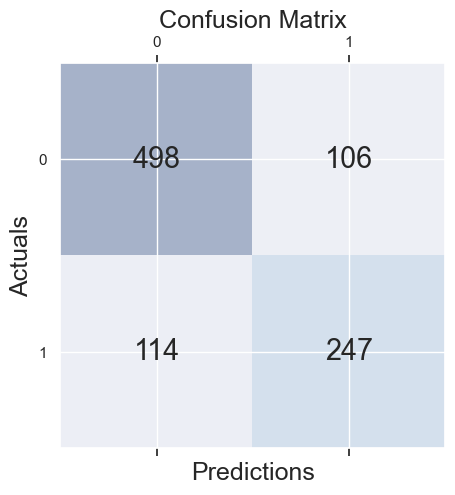

In [399]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_prediccion)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()